In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.utils import py_random_state
from networkx.generators.random_graphs import _random_subset
from networkx.generators.classic import star_graph
import numpy as np
import random

import scipy.stats as stats
from scipy.optimize import curve_fit


import time
import os

In [2]:
@py_random_state(2)
def barabasi_albert(n, m, seed=None, initial_graph=None):
    """Returns a random graph using Barabási–Albert preferential attachment

    A graph of $n$ nodes is grown by attaching new nodes each with $m$
    edges that are preferentially attached to existing nodes with high degree.

    Parameters
    ----------
    n : int
        Number of nodes
    m : int
        Number of edges to attach from a new node to existing nodes
    seed : integer, random_state, or None (default)
        Indicator of random number generation state.
        See :ref:`Randomness<randomness>`.
    initial_graph : Graph or None (default)
        Initial network for Barabási–Albert algorithm.
        It should be a connected graph for most use cases.
        A copy of `initial_graph` is used.
        If None, starts from a star graph on (m+1) nodes.

    Returns
    -------
    G : Graph

    Raises
    ------
    NetworkXError
        If `m` does not satisfy ``1 <= m < n``, or
        the initial graph number of nodes m0 does not satisfy ``m <= m0 <= n``.

    References
    ----------
    .. [1] A. L. Barabási and R. Albert "Emergence of scaling in
       random networks", Science 286, pp 509-512, 1999.
    """

    if m < 1 or m >= n:
        raise nx.NetworkXError(
            f"Barabási–Albert network must have m >= 1 and m < n, m = {m}, n = {n}"
        )

    if initial_graph is None:
        # Default initial graph : star graph on (m + 1) nodes
        G = star_graph(m)
    else:
        if len(initial_graph) < m or len(initial_graph) > n:
            raise nx.NetworkXError(
                f"Barabási–Albert initial graph needs between m={m} and n={n} nodes"
            )
        G = initial_graph.copy()

    # List of existing nodes, with nodes repeated once for each adjacent edge
    repeated_nodes = [n for n, d in G.degree() for _ in range(d)]
    # Start adding the other n - m0 nodes.
    source = len(G)
    while source < n:
        # Now choose m unique nodes from the existing nodes
        # Pick uniformly from repeated_nodes (preferential attachment)
        targets = _random_subset(repeated_nodes, m, seed)
        # Add edges to m nodes from the source.
        G.add_edges_from(zip([source] * m, targets))
        # Add one node to the list for each new edge just created.
        repeated_nodes.extend(targets)
        # And the new node "source" has m edges to add to the list.
        repeated_nodes.extend([source] * m)

        source += 1
    return G

In [3]:
seed = np.random.RandomState()           
time_steps = int(1e5) 
# t0 = time.time()

explorations_per_graph=10

def LinearSearch(lys, element):
    for i in range(len(lys)):
        if lys[i] == element:
            return i
    return -1

#definisco una funzione del grafo per poi fare la media tra grafi differenti

def time_nodes (G, explorations_per_graph):
    initial_node = _random_subset(G.nodes, 1, seed).pop()
       
    #dinamica di esplorazione: semplicemente riempio una lista dei nuovi nodi in cui va il walker. Linear search 
    #mi guarda se il nodo è gia presente e non lo aggiunge. Exploration fa un evoluzione temporale restituendo il nuovo nodo
    
    def exploration(initial_node, G, explored_nodes):
        if LinearSearch(explored_nodes, initial_node) < 0:
               explored_nodes += [initial_node]
        neighbours = list(G[initial_node])
        new_node = _random_subset(neighbours, 1, seed).pop()
        return new_node

    exploration_time = []
    explored_nodes = []

    #ripeto l'esplorazione di "time_steps" passi temporali "exploration_per_graph" volte per fare una media - i tempi 
    #di esplorazione variano molto di volta in volta. Semplicemente ogni iterazione mi cambia il nodo iniziale con quello
    #nuovo chiamando la funzione esplorazione. Quando tutti i nodi sono esplorati salvo il tempo impiegato e svuoto il vettore
    #Infine faccio una media dei tempi.
    
    for i in range(explorations_per_graph):
        t = 0
        while True:
            initial_node = exploration(initial_node, G, explored_nodes)
            if len(explored_nodes) == len(G.nodes):
                exploration_time += [t]
                explored_nodes.clear()
                break
            t += 1

    mean_exploration_time = sum(exploration_time)/explorations_per_graph
    print("mean_exploration_time: ", mean_exploration_time, "for", len(G.nodes) ,"nodes")

    return mean_exploration_time
    
#print(exploration_time)
#print(explored_nodes) 
#print(len(explored_nodes),"Explored nodes")
     

# print(f"done in {int((time.time()-t0)/60)} minutes and {((time.time()-t0)%60)} seconds")

Exploration for random graph

in funzione del numero di nodi t(N)

In [4]:
N = [20+i*20 for i in range(20)] # vettore dei nodi dei diversi grafi
P = 0.25
Times = []

#per ogni N creo un grafo e faccio una media dei tempi di esplorazione che plotto in funzione di N    
for i in range(len(N)):
    G = nx.erdos_renyi_graph(N[i], P)
    while min([d for n, d in G.degree()]) == 0:
          G = nx.erdos_renyi_graph(N[i], P)
    Times += [time_nodes(G, explorations_per_graph)]  


mean_exploration_time:  146.7 for 20 nodes
mean_exploration_time:  226.6 for 40 nodes
mean_exploration_time:  348.7 for 60 nodes
mean_exploration_time:  462.9 for 80 nodes
mean_exploration_time:  523.6 for 100 nodes
mean_exploration_time:  700.7 for 120 nodes
mean_exploration_time:  842.6 for 140 nodes
mean_exploration_time:  888.6 for 160 nodes
mean_exploration_time:  1233.0 for 180 nodes
mean_exploration_time:  1259.5 for 200 nodes
mean_exploration_time:  1337.9 for 220 nodes
mean_exploration_time:  1437.7 for 240 nodes
mean_exploration_time:  1680.7 for 260 nodes
mean_exploration_time:  1893.8 for 280 nodes
mean_exploration_time:  1958.4 for 300 nodes
mean_exploration_time:  2283.4 for 320 nodes
mean_exploration_time:  2172.0 for 340 nodes
mean_exploration_time:  2609.5 for 360 nodes
mean_exploration_time:  2301.2 for 380 nodes
mean_exploration_time:  2610.7 for 400 nodes


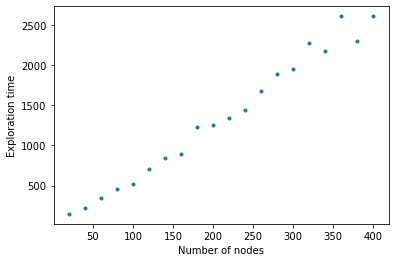

[  6.80086466 -82.27157895]


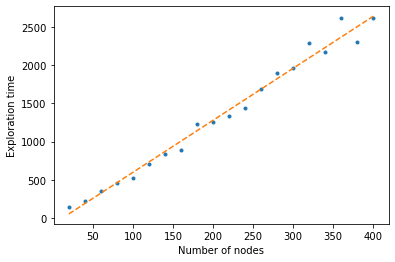

In [5]:
fig, ax = plt.subplots()
    
ax.plot(N, Times, '.', label = 'exploration_time')
ax.set_xlabel("Number of nodes")
ax.set_ylabel("Exploration time")

plt.show()

linear_fit=np.polyfit(N,Times,1)

print(linear_fit)

fit = [linear_fit[0]*n+linear_fit[1] for n in N]
fig, ax = plt.subplots()
    
ax.plot(N, Times, '.', label = 'exploration_time')
ax.set_xlabel("Number of nodes")
ax.set_ylabel("Exploration time")

ax.plot(N, fit, '--', label = 'fit')
plt.show()


in funzione di P t(P)

In [6]:
N = 50 # vettore dei nodi dei diversi grafi
P = [0.1+i*0.02 for i in range(45)]
Times = []

#per ogni N creo un grafo e faccio una media dei tempi di esplorazione che plotto in funzione di N    
for i in range(len(P)):
    G = nx.erdos_renyi_graph(N, P[i])
    while min([d for n, d in G.degree()]) == 0:
          G = nx.erdos_renyi_graph(N, P[i])
    Times += [time_nodes(G, explorations_per_graph)]
    print(P[i])

mean_exploration_time:  299.7 for 50 nodes
0.1
mean_exploration_time:  443.4 for 50 nodes
0.12000000000000001
mean_exploration_time:  394.9 for 50 nodes
0.14
mean_exploration_time:  290.2 for 50 nodes
0.16
mean_exploration_time:  232.1 for 50 nodes
0.18
mean_exploration_time:  249.8 for 50 nodes
0.2
mean_exploration_time:  260.9 for 50 nodes
0.22
mean_exploration_time:  228.6 for 50 nodes
0.24000000000000002
mean_exploration_time:  297.2 for 50 nodes
0.26
mean_exploration_time:  244.7 for 50 nodes
0.28
mean_exploration_time:  335.6 for 50 nodes
0.30000000000000004
mean_exploration_time:  241.6 for 50 nodes
0.32
mean_exploration_time:  281.4 for 50 nodes
0.33999999999999997
mean_exploration_time:  234.3 for 50 nodes
0.36
mean_exploration_time:  223.5 for 50 nodes
0.38
mean_exploration_time:  222.7 for 50 nodes
0.4
mean_exploration_time:  248.3 for 50 nodes
0.42000000000000004
mean_exploration_time:  223.6 for 50 nodes
0.44000000000000006
mean_exploration_time:  246.0 for 50 nodes
0.4599

Power_divergenceResult(statistic=10758.077385047798, pvalue=0.0)


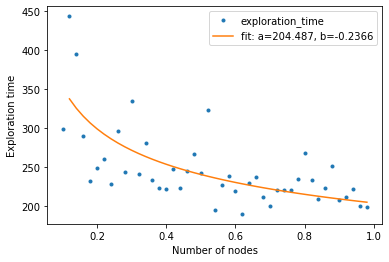

In [7]:
fig, ax = plt.subplots()
    
ax.plot(P, Times, '.', label = 'exploration_time')
ax.set_xlabel("Number of nodes")
ax.set_ylabel("Exploration time")


def power_law(x, a, b):
    return a*np.power(x, b)

x_low = 1
poptPower, pcovPower = curve_fit(power_law, P[x_low:], Times[x_low:]) 

fit_function = power_law(P[x_low:], *poptPower)

ax.plot(P[x_low:], fit_function, '-',
        label = f"fit: a={round(poptPower[0],3)}, b={round(poptPower[1],4)}")

ax.legend()
print(stats.chisquare(P[x_low:], fit_function))

plt.show()



Exploration for scale-free graph

in funzione del numero di nodi t(N)

In [8]:
N = [10+i*10 for i in range(20)]
M = 3
Times = []

G = nx.complete_graph(M)

for i in range(len(N)):
    G = barabasi_albert(N[i], M, initial_graph = G)
    Times += [time_nodes(G,explorations_per_graph)]  

mean_exploration_time:  30.4 for 10 nodes
mean_exploration_time:  126.8 for 20 nodes
mean_exploration_time:  230.2 for 30 nodes
mean_exploration_time:  303.4 for 40 nodes
mean_exploration_time:  359.7 for 50 nodes
mean_exploration_time:  499.1 for 60 nodes
mean_exploration_time:  578.0 for 70 nodes
mean_exploration_time:  689.9 for 80 nodes
mean_exploration_time:  901.4 for 90 nodes
mean_exploration_time:  989.0 for 100 nodes
mean_exploration_time:  1083.5 for 110 nodes
mean_exploration_time:  1387.0 for 120 nodes
mean_exploration_time:  1406.7 for 130 nodes
mean_exploration_time:  1529.8 for 140 nodes
mean_exploration_time:  1435.9 for 150 nodes
mean_exploration_time:  2002.7 for 160 nodes
mean_exploration_time:  1716.5 for 170 nodes
mean_exploration_time:  1680.1 for 180 nodes
mean_exploration_time:  2166.7 for 190 nodes
mean_exploration_time:  2096.6 for 200 nodes


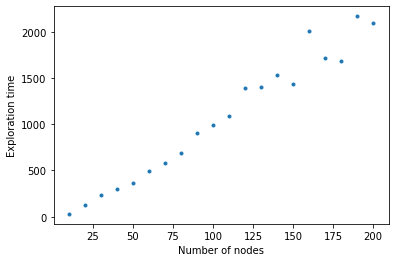

[  11.45541353 -142.14842105]


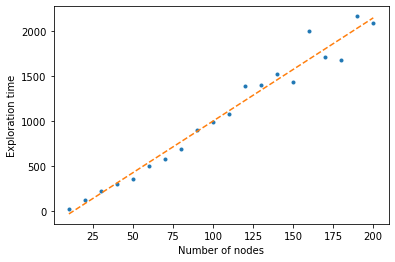

In [9]:
fig, ax = plt.subplots()
    
ax.plot(N, Times, '.', label = 'exploration_time')
ax.set_xlabel("Number of nodes")
ax.set_ylabel("Exploration time")

plt.show()

#fit lineare

linear_fit=np.polyfit(N,Times,1)

print(linear_fit)

fit = [linear_fit[0]*n+linear_fit[1] for n in N]
fig, ax = plt.subplots()
    
ax.plot(N, Times, '.', label = 'exploration_time')
ax.set_xlabel("Number of nodes")
ax.set_ylabel("Exploration time")

ax.plot(N, fit, '--', label = 'fit')
plt.show()

in funzione di M - t(M)

In [10]:
N = 200
M = [3+i*1 for i in range(20)]
Times = []

G = nx.complete_graph(M[0])

for i in range(len(M)):
    G = barabasi_albert(N, M[i], initial_graph = G)
    Times += [time_nodes(G,explorations_per_graph)]  
    print ("M = ", M[i])

mean_exploration_time:  2124.6 for 200 nodes
M =  3
mean_exploration_time:  2133.2 for 200 nodes
M =  4
mean_exploration_time:  2237.4 for 200 nodes
M =  5
mean_exploration_time:  2408.4 for 200 nodes
M =  6
mean_exploration_time:  2420.8 for 200 nodes
M =  7
mean_exploration_time:  2315.5 for 200 nodes
M =  8
mean_exploration_time:  2587.4 for 200 nodes
M =  9
mean_exploration_time:  1998.5 for 200 nodes
M =  10
mean_exploration_time:  2181.6 for 200 nodes
M =  11
mean_exploration_time:  2393.9 for 200 nodes
M =  12
mean_exploration_time:  2428.5 for 200 nodes
M =  13
mean_exploration_time:  2414.0 for 200 nodes
M =  14
mean_exploration_time:  2573.5 for 200 nodes
M =  15
mean_exploration_time:  2619.4 for 200 nodes
M =  16
mean_exploration_time:  2410.5 for 200 nodes
M =  17
mean_exploration_time:  2273.6 for 200 nodes
M =  18
mean_exploration_time:  2681.1 for 200 nodes
M =  19
mean_exploration_time:  2418.1 for 200 nodes
M =  20
mean_exploration_time:  2158.6 for 200 nodes
M =  21


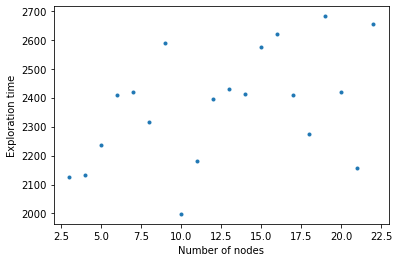

In [11]:
fig, ax = plt.subplots()
    
ax.plot(M, Times, '.', label = 'exploration_time')
ax.set_xlabel("Number of nodes")
ax.set_ylabel("Exploration time")

plt.show()